In [109]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [110]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np,matplotlib.pyplot as plt,keras,plotly.graph_objects as go,pandas as pd,cv2

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Flatten,Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
import random
import pickle

In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)  

In [115]:
for x in train_data:
  print(x) #printing keys

coords
labels
features
sizes


In [0]:
X_train,y_train=train_data['features'],train_data['labels']
X_test,y_test=test_data['features'],test_data['labels']
X_val,y_val=val_data['features'],val_data['labels']

In [117]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [118]:
df=pd.read_csv('german-traffic-signs/signnames.csv')
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [119]:
df.info

<bound method DataFrame.info of     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14            

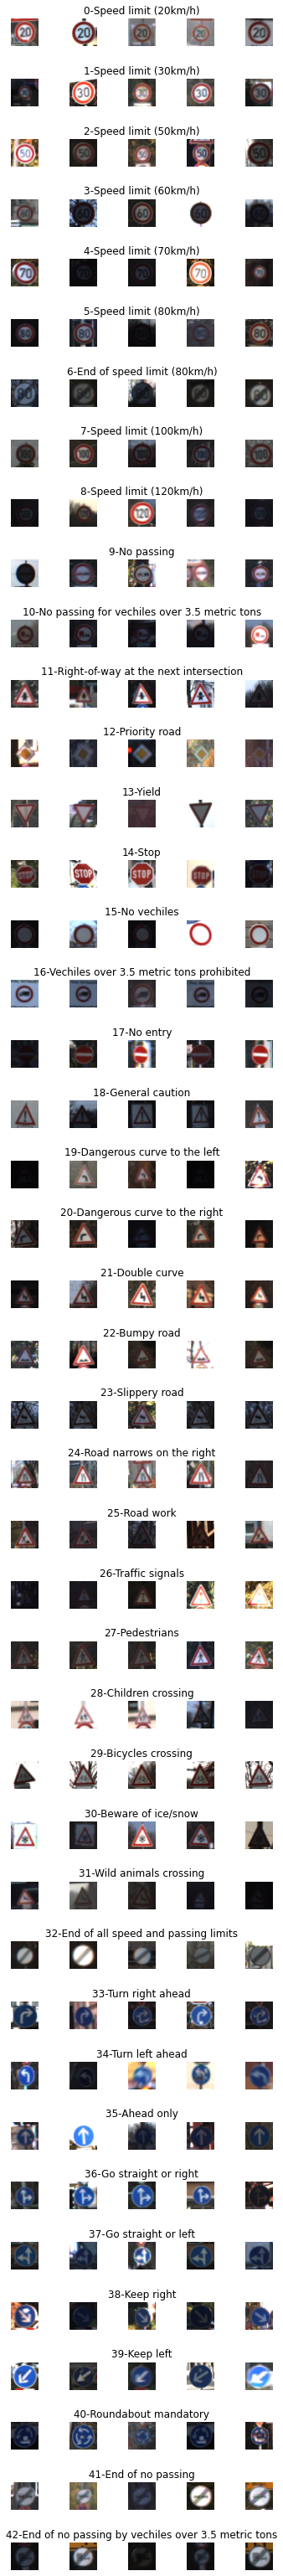

In [120]:
cols=5
num_classes=43
num_samples=[]

fig,axes=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,43))
plt.tight_layout()

for i in range(cols):
  for j,row in df.iterrows():
    x_selected=X_train[y_train==j]
    axes[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap('gray'))
    axes[j][i].axis('off')
    
    if(i==2):
      axes[j][i].set_title(str(j)+"-"+row['SignName'])
      num_samples.append(len(x_selected))

In [121]:
plotlyfig = go.Figure([go.Bar(x=np.arange(0,num_classes), y=num_samples)])
plotlyfig.show()

In [0]:
def grayScale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

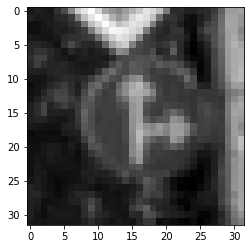

In [123]:
img=grayScale(X_train[1000])
plt.imshow(img,cmap=plt.get_cmap('gray'))

In [124]:
print(img.shape)

(32, 32)


In [0]:
def equalizeHist(img):
  img=cv2.equalizeHist(img)
  return img

In [0]:
img=equalizeHist(img)

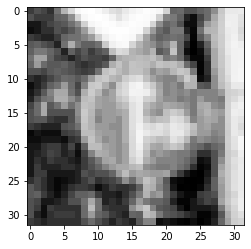

In [127]:
plt.imshow(img,cmap=plt.get_cmap('gray'))

In [0]:
def preprocessing(img):
  img=grayScale(img)
  img=equalizeHist(img)
  img=img/255
  print(img.shape)
  img=img.reshape(32,32,1)
  print(img.shape)
  return img

In [129]:
X_train=np.array(list(map(preprocessing,X_train)))
X_test=np.array(list(map(preprocessing,X_test)))
X_val=np.array(list(map(preprocessing,X_val)))

Streaming output truncated to the last 5000 lines.
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32, 32, 1)
(32, 32)
(32,

In [0]:
def showMyPic(img):
  img=img.reshape(32,32)
  plt.imshow(img,cmap=plt.get_cmap('gray'))
  plt.axis('off')

41


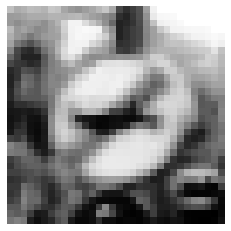

In [131]:
showMyPic(X_train[100])
print(y_train[100])

In [132]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(width_shift_range=.1,
                           height_shift_range=.1,
                           zoom_range=.2,
                           shear_range=.1,
                           rotation_range=10)
datagen.fit(X_train)

In [0]:
model=Sequential()
model.add(Conv2D(100,(5,5),input_shape=(32,32,1),activation='relu'))
model.add(Conv2D(100,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(60,(3,3),activation='relu'))
model.add(Conv2D(60,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(Adam(learning_rate=.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [258]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 100)       2600      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 100)       250100    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 100)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 60)        54060     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 8, 8, 60)          32460     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 60)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4, 4, 60)        

In [259]:
#history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=400)

history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=100),steps_per_epoch=2000,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
2000/2000 [==============================] - 105s 53ms/step - loss: 0.7053 - accuracy: 0.7914 - val_loss: 0.0724 - val_accuracy: 0.9796
Epoch 2/10
2000/2000 [==============================] - 103s 51ms/step - loss: 0.1521 - accuracy: 0.9524 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 3/10
2000/2000 [==============================] - 103s 51ms/step - loss: 0.1039 - accuracy: 0.9680 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 4/10
2000/2000 [==============================] - 103s 52ms/step - loss: 0.0820 - accuracy: 0.9747 - val_loss: 0.0378 - val_accuracy: 0.9907
Epoch 5/10
2000/2000 [==============================] - 104s 52ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 6/10
2000/2000 [==============================] - 103s 51ms/step - loss: 0.0579 - accuracy: 0.9824 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 7/10
2000/2000 [==============================] - 103s 52ms/step - loss: 0.0548 - accuracy: 0.9837 - val_loss: 0

In [0]:
def plotModelHistory(param1,param2):
  plt.plot(history.history[param1])
  plt.plot(history.history[param2])

  plt.xlabel('epochs')
  plt.legend([param1,param2])


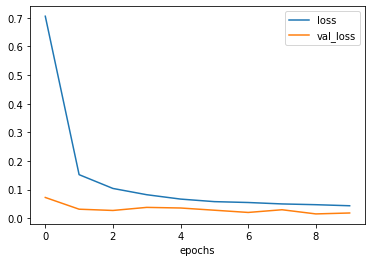

In [260]:
plotModelHistory('loss','val_loss')

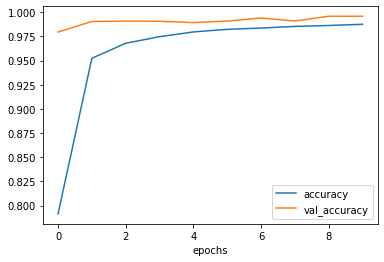

In [261]:
plotModelHistory('accuracy','val_accuracy')

In [262]:
score=model.evaluate(X_test,y_test)
print('Test Score = ',score[0])
print('Test Accuracy = ',score[1])

12630/12630 [==============================] - 3s 224us/step
Test Score =  0.06687333082218815
Test Accuracy =  0.9824228286743164


# Testing

In [143]:
df['SignName']

0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vechiles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vechiles
16             Vechiles over 3.5 metric tons prohibited
17                                             N

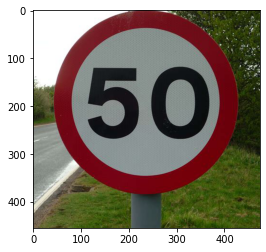

In [341]:
import requests
from PIL import Image
url='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.W4KQ3wnnkhbosybiBXNwzwHaHH%26pid%3DApi&f=1'
response=requests.get(url,stream=True)

img=Image.open(response.raw)
plt.imshow(img)


In [342]:
import cv2

img_array=np.asarray(img)
print(img_array.shape)

resized=cv2.resize(img_array,(32,32))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)

(455, 474, 3)
(32, 32)


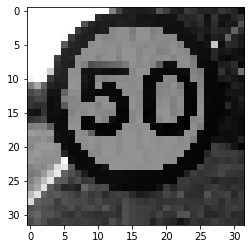

In [343]:
plt.imshow(gray_scale,cmap=plt.get_cmap('gray'))

In [0]:
#image_from_net=cv2.bitwise_not(gray_scale)
#plt.imshow(image_from_net,cmap=plt.get_cmap('gray'))

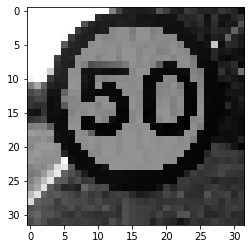

In [345]:
image_from_net=gray_scale
image_from_net=image_from_net/255
plt.imshow(image_from_net,cmap=plt.get_cmap('gray'))
image_from_net=image_from_net.reshape(1,32,32,1)

In [346]:
pred=model.predict_classes(image_from_net)
print('Prediction: ',pred)

Prediction:  [2]


# Tested with the below links

https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg